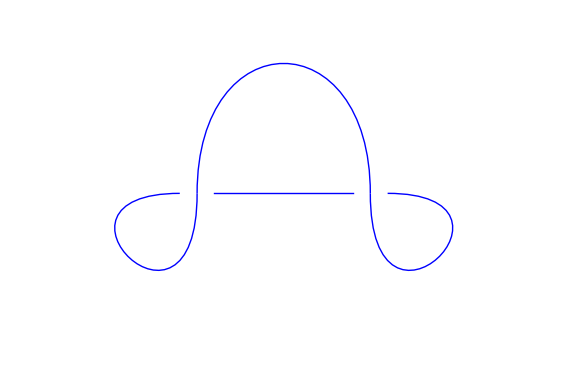

In [61]:
W = Knots()
K1 = W.from_gauss_code([-1,-2,2,1])
K1.plot()

In [55]:
#This program is desigened to take realizable wirtinger presenstations and
# produce an image of a Gauss diagram of the virtual knot that has knot group
# equal to the presenstation inputed.

# the arguement gens is the (natural) number of generators in the presentaiton
# rels is the list of relations of the form t_{i+1}^{-1} t_i^{\pm t_j} which
# are represented by lists [i, \pm j] (the sign is given)
def main(rels):
    length = 500
    r = 200
    win = GraphWin("My Circle", length, length)
    gens = len(rels)
    c = Circle(Point(length/2, length/2), r)
    pnts = [Point(length/2 + r*math.cos(2*n*math.pi/float(gens)), length/2 + r*math.sin(2*n*math.pi/float(gens))) for n in range(gens)]
    for i in range(gens):
        num = 1
        occ = 1
        rel = rels[i]
        for k in range(i):
            if rels[k][1] == rel[1]:
                occ += 1
        for k in range(gens):
            if rels[k][1] == rel[1]:
                num += 1
        x = Line(pointInBetween(gens,r,length, rel[1], num, occ), pnts[rel[0] % gens])
        x.setArrow("last")
        x.draw(win)

    c.draw(win)
    win.getMouse() # Pause to view result
    win.close()    # Close window when done

def pointInBetween(gens, r, length, n, numOfArrows, occurance):
    return Point(length/2 + r*math.cos(2*((n+(occurance/float(1 + numOfArrows))) % gens)*math.pi/float(gens)), length/2 + r*math.sin(2*((n+(occurance/float(1 + numOfArrows))) % gens)*math.pi/float(gens)))

# This function takes in a realizable wirtinger presentation and gets a possible gauss code corresponding to a knot whose group is isomorphic to the realizable wirtinger presentaiton
def getGCode(rels):
    gens = len(rels) # This is the number of generators we have in the presentation
    arrows = [rels[i].append(i+1) for i in range(gens)] # We have one arrow in the gauss diagram for each relations
    code = [-(i + 1) for i in range(gens)] # initially, we can specify where the undercraossings happen in the gauss code
    for i in range(gens): # for each arrow tail (which is defined by the 'j' in the relation), we can add this in the appropriate part of the gauss code
        x = list(filter(lambda x: x[1] == i+1, rels)) # Now, we want to add each of these in between
        for k in range(len(x)):
            code.insert(code.index(-(i+1))+1, x[len(x) - k - 1][2])
    return code



In [4]:
K1 = W.from_gauss_code([-1, 3, 5, 6, 8, -2, -3, -4, -5, 1, 2, 4, 7, -6, -7, -8])

ValueError: too many values to unpack (expected 2)

In [56]:
print(getGCode([[1, 2], [2,1], [3, 1]]))

[-1, 2, 3, -2, 1, -3]
